In [1]:
#Read annotations from csv
import requests
import pandas as pd
r=requests.get('https://github.com/mlukan/GDA3B2021/raw/main/ProjectFaceMask/annotdf.csv')
from io import StringIO
#StringIO("""col1;col2;col3
andf=pd.read_csv(StringIO(r.text),sep=';')

In [2]:
andf

,Unnamed: 0,xmin,ymin,xmax,ymax,label,file,width,height,depth
0,0,76,236,149,349,without_mask,maksssksksss530.png,301,400,3
1,1,241,60,271,97,with_mask,maksssksksss367.png,400,267,3
2,2,89,169,215,309,without_mask,maksssksksss442.png,301,400,3
3,3,156,80,222,155,with_mask,maksssksksss242.png,400,300,3
4,4,75,75,158,161,with_mask,maksssksksss215.png,400,400,3
...,...,...,...,...,...,...,...,...,...,...
4067,4067,235,43,272,87,with_mask,maksssksksss116.png,400,225,3
4068,4068,304,68,336,102,with_mask,maksssksksss116.png,400,225,3
4069,4069,379,61,399,96,with_mask,maksssksksss116.png,400,225,3
4070,4070,89,210,180,303,with_mask,maksssksksss339.png,400,400,3


In [3]:
import xmltodict
import os
def parse_file(path,file=None):
    '''
    parses xml file into list of dictionaries
    '''
    path=path+file
    
    def parse_object(obj,metadata):
        #Parse annotation['object'] into a dictionary including parent metadata
        objdict={}
        objdict = obj['bndbox']
        #print(objdict)
        objdict['label']=obj['name']
        outdict = {**objdict,**metadata}
        return outdict
    #print(path)
    with open(path,'r') as f:
        #Read xml file and parse it into an ordered dictionary
        parsed=xmltodict.parse(f.read())
        #Select just the key 'annotation' for further processing
        annot=parsed['annotation']
        
        parselist=[]
        metadata={}
        metadata['file']=annot['filename']
        size= annot['size']
        #Collect  image metadata
        metadata={**metadata,**size}
        #print('Metadata',metadata)
        #Extract data about labeled objects
        if type(annot['object']) is list:
            for obj in annot['object']:
                parselist.append(parse_object(obj,metadata))
        else:
            parselist.append(parse_object(annot['object'],metadata))
        return parselist
#parse_file(os.getcwd()+'/','test.xml')


In [4]:
#Create a list of dictionaries of fall xml files in a specified directory
import os
import pandas as pd
datalist=[]
for file in os.listdir('annotations'):
    if 'xml' in file:
        objlist=parse_file('./annotations/',file)
        datalist.extend(objlist)
annotdf=pd.DataFrame(datalist)


In [5]:
annotdf

,xmin,ymin,xmax,ymax,label,file,width,height,depth
0,76,236,149,349,without_mask,maksssksksss530.png,301,400,3
1,241,60,271,97,with_mask,maksssksksss367.png,400,267,3
2,89,169,215,309,without_mask,maksssksksss442.png,301,400,3
3,156,80,222,155,with_mask,maksssksksss242.png,400,300,3
4,75,75,158,161,with_mask,maksssksksss215.png,400,400,3
...,...,...,...,...,...,...,...,...,...
4067,235,43,272,87,with_mask,maksssksksss116.png,400,225,3
4068,304,68,336,102,with_mask,maksssksksss116.png,400,225,3
4069,379,61,399,96,with_mask,maksssksksss116.png,400,225,3
4070,89,210,180,303,with_mask,maksssksksss339.png,400,400,3


In [6]:
annotdf.groupby(by='label').count().sort_values(by='label',ascending=False)

,xmin,ymin,xmax,ymax,file,width,height,depth
label,,,,,,,,
without_mask,717,717,717,717,717,717,717,717
with_mask,3232,3232,3232,3232,3232,3232,3232,3232
mask_weared_incorrect,123,123,123,123,123,123,123,123


In [7]:
annotdf[annotdf['file']=='maksssksksss603.png']

,xmin,ymin,xmax,ymax,label,file,width,height,depth
1325,49,11,55,17,with_mask,maksssksksss603.png,400,278,3
1326,32,52,40,60,with_mask,maksssksksss603.png,400,278,3
1327,52,76,61,86,without_mask,maksssksksss603.png,400,278,3
1328,47,98,58,109,with_mask,maksssksksss603.png,400,278,3
1329,68,100,75,111,with_mask,maksssksksss603.png,400,278,3
...,...,...,...,...,...,...,...,...,...
1435,356,18,362,24,with_mask,maksssksksss603.png,400,278,3
1436,346,9,351,16,with_mask,maksssksksss603.png,400,278,3
1437,370,13,376,18,with_mask,maksssksksss603.png,400,278,3
1438,382,6,386,12,without_mask,maksssksksss603.png,400,278,3


In [8]:
from PIL import Image
import numpy as np
im = np.asarray(Image.open('./images/maksssksksss603.png'))
im.shape

(278, 400, 4)

In [9]:
andf.rename(columns={'Unnamed: 0':'image'},inplace=True)

In [12]:
import matplotlib.pyplot as plt
imagelist=[]
from PIL import Image
for i,row in andf.iterrows():
    im=Image.open('./images/'+row['file'])
    im = im.crop((row['xmin'], row['ymin'],row['xmax'],row['ymax']))
    imresized = im.resize((32,32))
    imagelist.append(imresized)

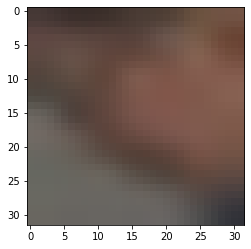

In [13]:
plt.imshow(imagelist[21])

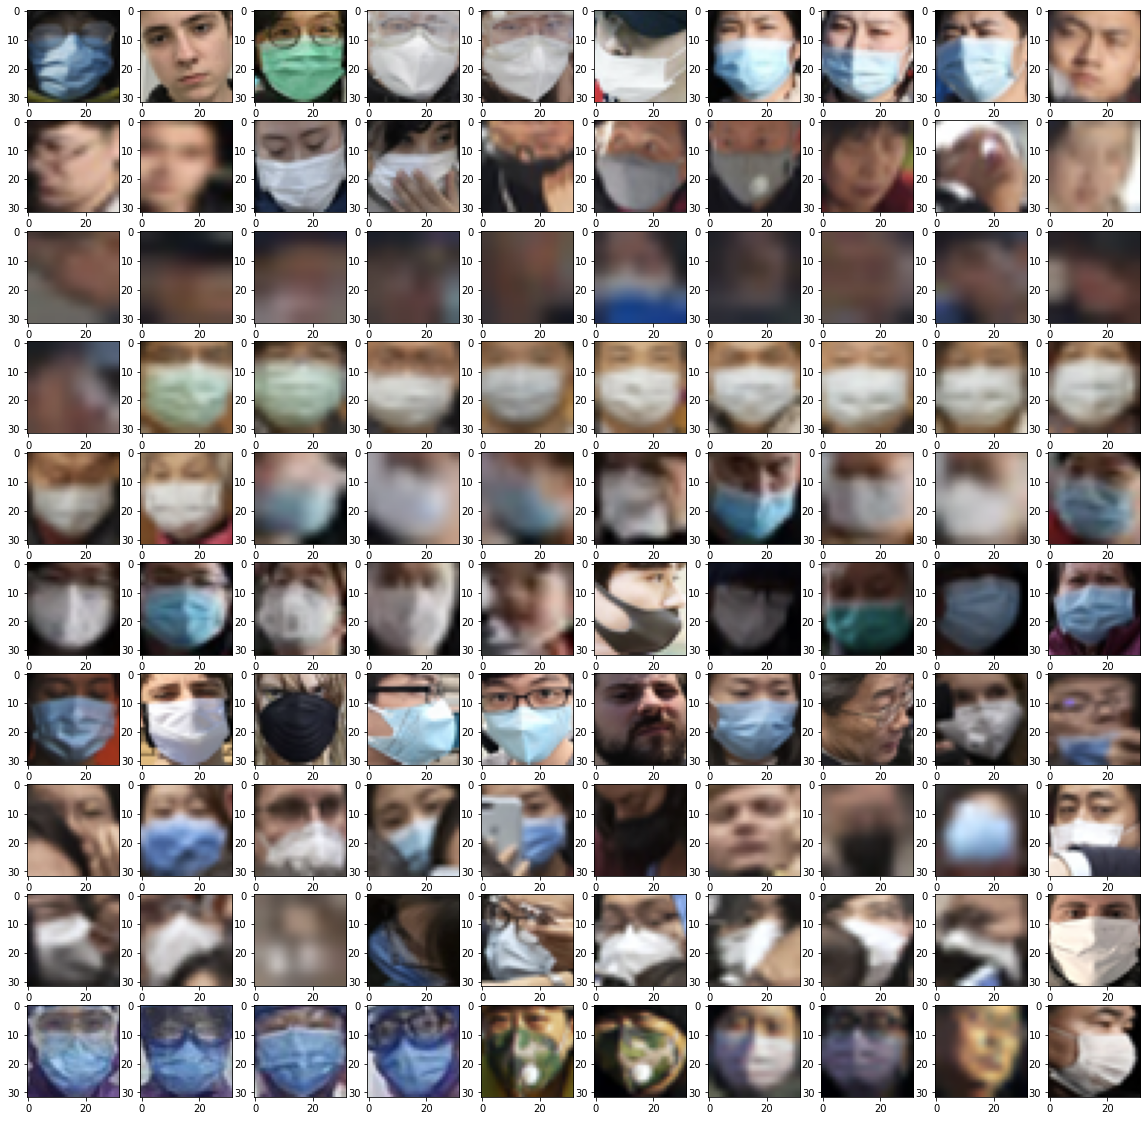

In [14]:
w = 10
h = 10
fig = plt.figure(figsize=(20, 20))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = imagelist[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [15]:
imagearray=np.stack([np.array(im)[...,:3]  for im in imagelist], axis=0)

In [16]:
imagearray.shape

(4072, 32, 32, 3)

In [17]:
imagesflat=imagearray.reshape(4072,32*32*3)
imagesflat.shape

(4072, 3072)

### SVM model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(imagesflat/255,andf['label'])


In [33]:
%%time
SVM = svm.SVC(C=1, kernel='rbf',class_weight='balanced')
SVM.fit(X_train,y_train)
predictions = SVM.predict(X_test)
print("Accuracy: ",accuracy_score(predictions, y_test)*100)


Accuracy:  93.02554027504911
CPU times: user 25.2 s, sys: 0 ns, total: 25.2 s
Wall time: 25.2 s


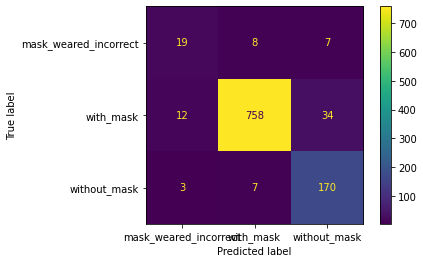

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=SVM.classes_);
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM.classes_);
disp.plot(values_format = '');

In [21]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(y_test, predictions,labels=SVM.classes_,zero_division=1,output_dict=True))

,mask_weared_incorrect,with_mask,without_mask,accuracy,macro avg,weighted avg
precision,0.558824,0.980595,0.805687,0.930255,0.781702,0.935582
recall,0.558824,0.942786,0.944444,0.930255,0.815351,0.930255
f1-score,0.558824,0.961319,0.869565,0.930255,0.796569,0.931652
support,34.000000,804.000000,180.000000,0.930255,1018.000000,1018.000000


### Lazy predict
I had trouble with lazypredict version 0.2.9  due to unresolved sklearn dependencies. Had to downgrade to version 0.2.8

In [ ]:
#!pip install lazypredict==0.2.8
from lazypredict.Supervised import LazyClassifier


In [24]:

clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [07:39<00:00, 15.86s/it]


In [28]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.89,0.72,None,0.89,24.93
LogisticRegression,0.91,0.70,None,0.91,4.03
Perceptron,0.92,0.69,None,0.91,1.91
PassiveAggressiveClassifier,0.90,0.69,None,0.90,4.25
XGBClassifier,0.94,0.67,None,0.93,63.78
SGDClassifier,0.92,0.66,None,0.91,2.93
LGBMClassifier,0.94,0.65,None,0.92,77.08
GaussianNB,0.65,0.65,None,0.70,0.83
KNeighborsClassifier,0.92,0.64,None,0.90,19.13


###  Linear SVC

Accuracy:  91.74852652259332
CPU times: user 21 s, sys: 67.9 ms, total: 21 s
Wall time: 21 s


,mask_weared_incorrect,with_mask,without_mask,accuracy,macro avg,weighted avg
precision,0.38,0.96,0.84,0.92,0.72,0.92
recall,0.35,0.95,0.89,0.92,0.73,0.92
f1-score,0.36,0.95,0.86,0.92,0.73,0.92
support,34.00,804.00,180.00,0.92,1018.00,1018.00


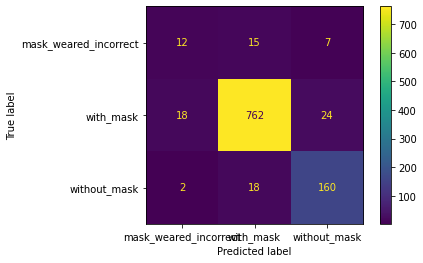

In [32]:
%%time
SVC = svm.LinearSVC(class_weight='balanced')
SVC.fit(X_train,y_train)
predictionsSVC = SVC.predict(X_test)
print("Accuracy: ",accuracy_score(predictionsSVC, y_test)*100)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictionsSVC, labels=SVC.classes_);
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVC.classes_);
disp.plot(values_format = '');
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(y_test, predictionsSVC,labels=SVC.classes_,zero_division=1,output_dict=True))

### Conclusion
Due to dataset imbalance - mask_weared_incorrect is heavily underrepresented, the prediction for this class is not good. The best ML method suggested by lazypredict - LinearSVC actually did not work better than SVM with some hyperparameter tuning

The overall accuracy of the baseline SVM model reaches 93%, F1-score 0.93 with good prediction accuracy on class "with mask" and a bit worse on "without_mask"